# Вывод траектории гематопоэза у мышей.





Гематопоэз — это динамический процесс, посредством которого самообновляющиеся стволовые клетки генерируют потомство, которое дифференцируется в клетки эритроидного, миелоидного или лимфоидного происхождения с прогрессирующей ограниченностью.
Вывод траектории кроветворения у мышей [Paul et al. (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

In [ ]:
pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 33.1 MB/s 
     |████████████████████████████████| 9.4 MB 58.2 MB/s 
     |████████████████████████████████| 88 kB 9.1 MB/s 
     |████████████████████████████████| 96 kB 5.9 MB/s 
     |████████████████████████████████| 965 kB 47.2 MB/s 
     |████████████████████████████████| 295 kB 66.6 MB/s 
     |████████████████████████████████| 1.1 MB 54.7 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7edd705847aba1468514b9e038d4e5d3799b2bc81e5e4b63f567e1a096f6f798
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=a052d03351ef090f91db7bb98eb548db9f8fd8e575fd03322c80fbee2a0b709c
  Stored in direct

In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 24.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 31.6 MB/s 


In [ ]:
pip install louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 15.9 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [ ]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './write/paul15.h5ad'
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         7.1.2
astor                       0.8.1
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
certifi                     2022.09.24
cffi                        1.15.1
cloudpickle                 1.5.0
cycler                      0.10.0
cython_runtime              NA
dask                        2022.02.0
dateutil                    2.8.2
debugpy                     1.0.0
decorator                   4.4.2
fsspec                      2022.11.0
google                      NA
h5py                        3.1.0
httplib2                    0.17.4
igraph                      0.10.2
ipykernel                   5.3.4
ipython_genutils            0.2.0
jinja2                      2.11.3
joblib                      1.2.0
kiwisolver                  1.4.4
llvmlite                    0.39.1
louvain                     0.8.0
markupsafe                  2.0.1
matplotlib                 

In [ ]:
adata = sc.datasets.paul15()

  0%|          | 0.00/9.82M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [ ]:
adata

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

Давайте работать с более высокой точностью, чем по умолчанию «float32», чтобы обеспечить точно такие же результаты на разных вычислительных платформах.

In [ ]:
adata.X = adata.X.astype('float64')  # this is not required and results will be comparable without it

## Предварительная обработка и визуализация

Примените простой [рецепт предварительной обработки](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.pp.recipe_zheng17.html).

In [ ]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:00)


In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:01)


In [ ]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:17)


In [ ]:
sc.pl.draw_graph(adata, color='paul15_clusters', legend_loc='on data')

Выглядит довольно неаккуратно.

## Optional: шумоподавление графика

Чтобы убрать шум с графика, мы представляем его в пространстве диффузионной карты (а не в пространстве PCA). Вычисление расстояний в пределах нескольких компонентов диффузии сводится к удалению шума из графика — мы просто берем несколько первых спектральных компонентов. Это очень похоже на шумоподавление матрицы данных с использованием PCA. Этот подход использовался в нескольких статьях, см., например, Schiebinger et al. (2017) или Tabaka et al. (2018) . Это также связано с принципами MAGIC Dijk et al. (2018) .

**Note**
    
Это не обязательный шаг ни для PAGA, ни для кластеризации, ни для оценки псевдовремени. С таким же успехом вы можете продолжить работу с графом без шумоподавления. Во многих ситуациях (в том числе и здесь) это даст вам очень достойные результаты.

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9989278  0.99671    0.99430376 0.98939794
     0.9883687  0.98731077 0.98398703 0.983007   0.9790806  0.9762548
     0.9744365  0.9729161  0.9652972 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [ ]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:18)


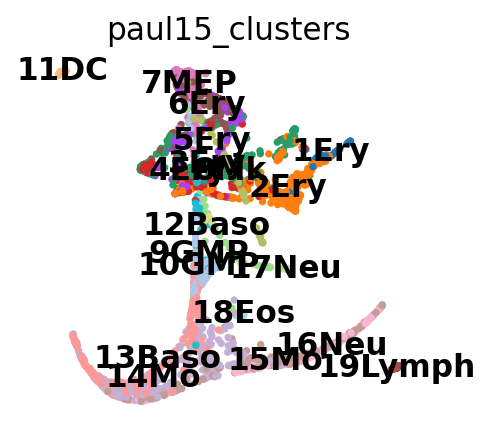

In [ ]:
sc.pl.draw_graph(adata, color='paul15_clusters', legend_loc='on data')

Всё еще выглядит беспорядочно, но по-другому: многие ветки перечеркнуты.

## Кластеризация и PAGA

In [ ]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 25 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


Аннотация кластеров с помощью маркерных генов.

| cell type | marker |
| --- | --- |
|HSCs | Procr |
|Erythroids | Gata1, Klf1, Epor, Gypa, Hba-a2, Hba-a1, Spi1 |
|Neutrophils | Elane, Cebpe, Ctsg, Mpo, Gfi1 |
|Monocytes | Irf8, Csf1r, Ctsg, Mpo |
|Megakaryocytes | Itga2b (encodes protein CD41), Pbx1, Sdpr, Vwf |
|Basophils | Mcpt8, Prss34 |
|B cells | Cd19, Vpreb2, Cd79a |
|Mast cells| Cma1, Gzmb, CD117/C-Kit |
|Mast cells & Basophils| Ms4a2, Fcer1a, Cpa3, CD203c (human)|


Для простой, крупнозернистой визуализации вычислите граф PAGA, крупнозернистый и упрощенный (абстрактный) граф. Незначительные ребра в крупнозернистом графе удаляются пороговым значением.

In [ ]:
sc.tl.paga(adata, groups='louvain')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


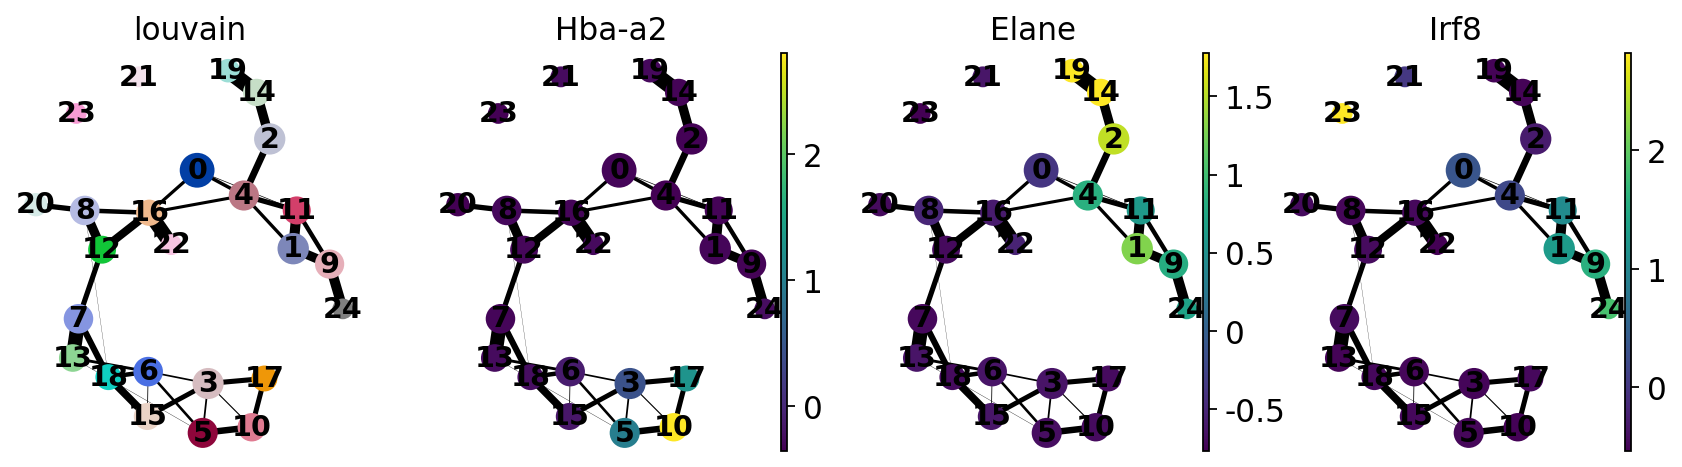

In [ ]:
sc.pl.paga(adata, color=['louvain', 'Hba-a2', 'Elane', 'Irf8'])

In [ ]:
sc.pl.paga(adata, color=['louvain', 'Itga2b', 'Prss34', 'Cma1'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


Аннотация кластеров, обратим внимание, что Cma1 является маркером тучных клеток и появляется только в небольшой части клеток в кластере клеток-предшественников/стволовых клеток 8, см. график разрешения одной клетки ниже.

In [ ]:
adata.obs['louvain'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

In [ ]:
adata.obs['louvain_anno'] = adata.obs['louvain']

In [ ]:
adata.obs['louvain_anno'].cat.categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10/Ery', '11', '12',
       '13', '14', '15', '16/Stem', '17', '18', '19/Neu', '20/Mk', '21', '22/Baso', '23', '24/Mo']

Давайте использовать аннотированные кластеры для PAGA.

In [ ]:
sc.tl.paga(adata, groups='louvain_anno')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


In [ ]:
sc.pl.paga(adata, threshold=0.03, show=False)

--> added 'pos', the PAGA positions (adata.uns['paga'])


## Пересчет встраивания с помощью PAGA-инициализации

Следующее также возможно для UMAP.

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:15)


Теперь мы можем видеть все маркерные гены также с разрешением одной клетки в осмысленном расположении.

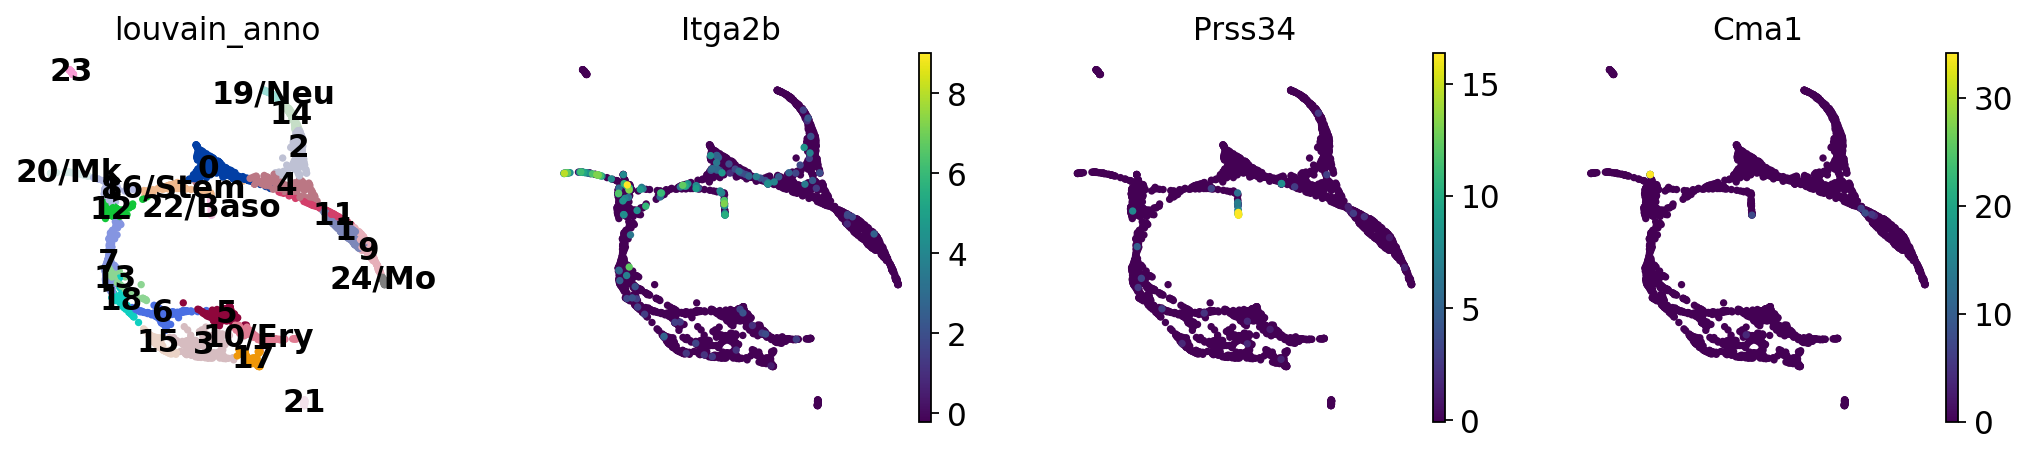

In [ ]:
sc.pl.draw_graph(adata, color=['louvain_anno', 'Itga2b', 'Prss34', 'Cma1'], legend_loc='on data')

Выбираем цвета кластеров более последовательно.

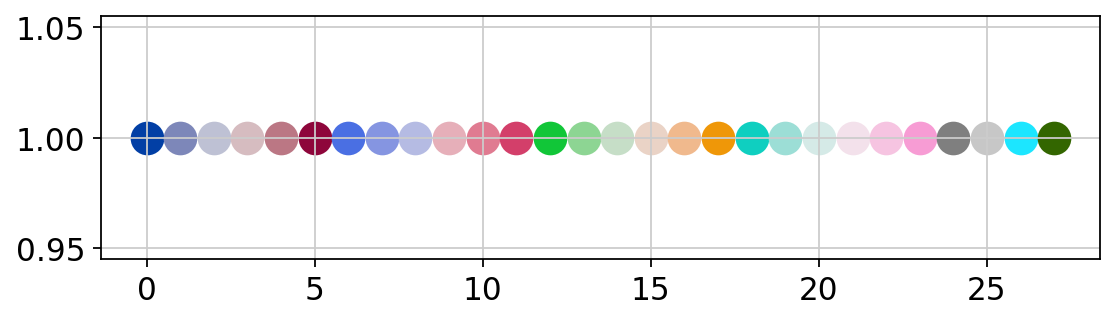

In [ ]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [ ]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns['louvain_anno_colors'])

In [ ]:
new_colors[[16]] = zeileis_colors[[12]]  # Stem colors / green
new_colors[[10, 17, 5, 3, 15, 6, 18, 13, 7, 12]] = zeileis_colors[[5, 5, 5, 5, 11, 11, 10, 9, 21, 21]]  # Ery colors / red
new_colors[[20, 8]] = zeileis_colors[[17, 16]]  # Mk early Ery colors / yellow
new_colors[[4, 0]] = zeileis_colors[[2, 8]]  # lymph progenitors / grey
new_colors[[22]] = zeileis_colors[[18]]  # Baso / turquoise
new_colors[[19, 14, 2]] = zeileis_colors[[6, 6, 6]]  # Neu / light blue
new_colors[[24, 9, 1, 11]] = zeileis_colors[[0, 0, 0, 0]]  # Mo / dark blue
new_colors[[21, 23]] = zeileis_colors[[25, 25]]  # outliers / grey

In [ ]:
adata.uns['louvain_anno_colors'] = new_colors

И добавим немного пробела к некоторым именам кластеров. Макет, показанный здесь, отличается от макета в статье, которую можно найти [здесь](https://github.com/theislab/paga/blob/f53fcdf4a861b7d3410f8096ffc13a07f1d225c0/blood/paul15/paul15.ipynb). Эти различия, однако, только косметические. Нам пришлось изменить макет, когда мы перешли от рандомизированной точности PCA и float32 к точности float64.

--> added 'pos', the PAGA positions (adata.uns['paga'])


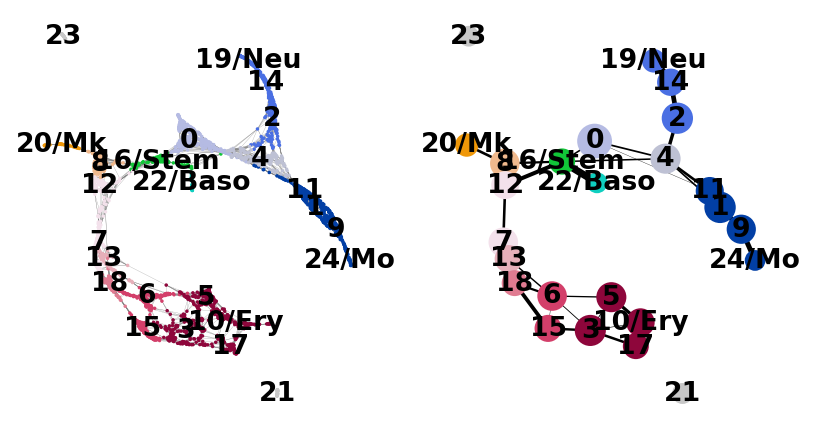

In [ ]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

## Реконструкция изменений генов вдоль путей PAGA для заданного набора генов.

Выбираем корневую ячейку для диффузионного псевдовремени.

In [ ]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain_anno']  == '16/Stem')[0]

In [ ]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


Выбираем некоторые из названий маркерных генов.

In [ ]:
gene_names = ['Gata2', 'Gata1', 'Klf1', 'Epor', 'Hba-a2',  # erythroid
              'Elane', 'Cebpe', 'Gfi1',                    # neutrophil
              'Irf8', 'Csf1r', 'Ctsg']                     # monocyte

Используем полные необработанные данные для визуализации.

In [ ]:
adata_raw = sc.datasets.paul15()
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


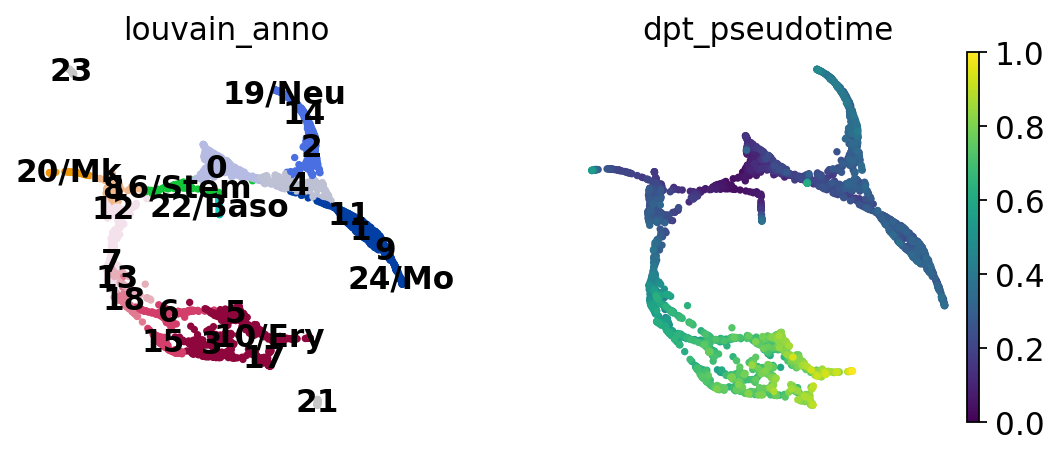

In [ ]:
sc.pl.draw_graph(adata, color=['louvain_anno', 'dpt_pseudotime'], legend_loc='on data')

In [ ]:
paths = [('erythrocytes', [16, 12, 7, 13, 18, 6, 5, 10]),
         ('neutrophils', [16, 0, 4, 2, 14, 19]),
         ('monocytes', [16, 0, 4, 11, 1, 9, 24])]

In [ ]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [ ]:
adata.obs['clusters'] = adata.obs['louvain_anno']  # just a cosmetic change

In [ ]:
adata.uns['clusters_colors'] = adata.uns['louvain_anno_colors']

In [ ]:
!mkdir write

In [ ]:
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,                         
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.savefig('./figures/paga_path_paul15.pdf')
pl.show()